<a href="https://colab.research.google.com/github/dhanuhkumardk112/Reinforcement-learning/blob/main/assignment1%20part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 8.1 MB/s eta 0:00:00


In [2]:
from google.colab import widgets
import gymnasium as gym
import copy
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time


class DeterministicEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # Define action and observation space
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(12)

        # Define state transition matrix
        self.transition_matrix = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 0, 0, 1]])

        # Define reward matrix
        self.rewards = np.array([-50,100,150,300])
        

        self.current_state = None
        self.time_step = None
        self.reward = None
        self.done = None

    def step(self, action):
        assert self.action_space.contains(action)
        self.current_state = int(self.current_state)
        action = int(action)

        # Update state
        # print(self.current_state)
        # print(action)
        # print("----------------------------------")
        # print(self.transition_matrix[self.current_state, action])
        self.current_state = np.argmax(self.transition_matrix[self.current_state, action])
        # print(self.current_state)

        rewards = np.array([-50,100,150,300])

        # Get reward
        for i in range(4):
          self.reward = np.random.choice(rewards)

        # Increment time step
        self.time_step += 1

        # Define termination criteria
        self.done = self.time_step >= 10

        return self.current_state, self.reward, self.done, {}

    def reset(self):
        self.current_state = np.random.randint(0, 12)
        self.time_step = 0
        self.reward = 0
        self.done = False
        return self.current_state

    def render(self, mode='human'):
        # Define gridworld
        gridworld = np.zeros((3, 4))
        for i in range(3):
            for j in range(4):
                gridworld[i, j] = i*4 + j

        # Set current position
        x, y = self.current_state // 4, self.current_state % 4
        gridworld[x, y] = -1

        # Set rewards
        for i, reward in enumerate(self.rewards):
            x, y = i // 4, i % 4
            gridworld[x, y] = reward

        # Define color map
        cmap = plt.cm.get_cmap('viridis', len(self.rewards) + 1)
        cmap.set_under(color='black')

        # Plot gridworld
        plt.imshow(gridworld, cmap=cmap, vmin=-1, vmax=len(self.rewards))
        plt.xticks([])
        plt.yticks([])
        plt.colorbar(ticks=list(range(len(self.rewards) + 1)))
        plt.show()

# Deterministic Environment

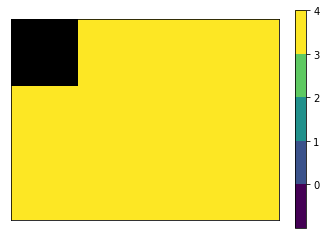

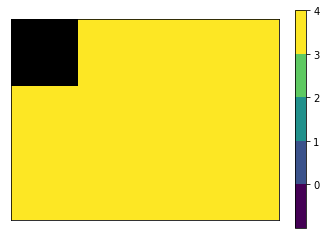

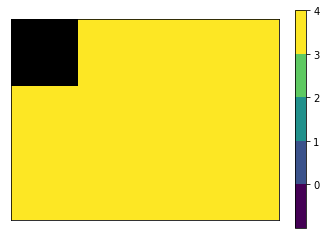

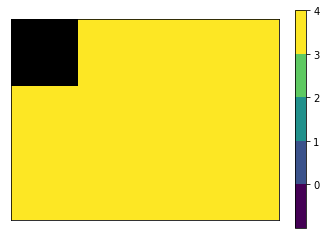

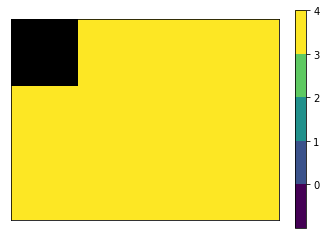

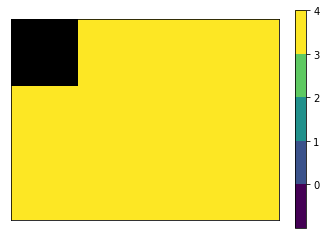

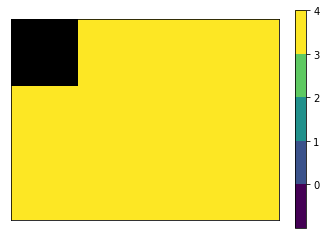

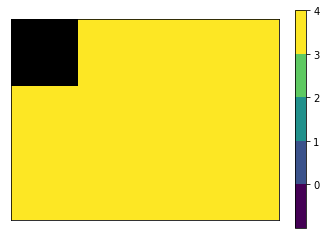

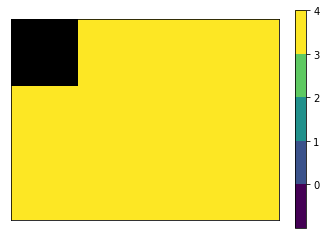

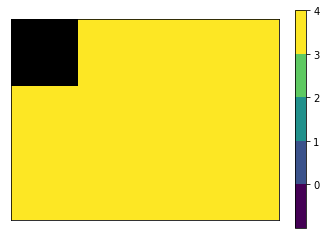

In [3]:
import gym

# create an instance of the deterministic environment
env = DeterministicEnv()

# reset the environment to get the initial state
state = env.reset()

# run the environment for 10 timesteps with random actions
for i in range(10):
    # choose a random action from the action space
    action = env.action_space.sample()
    
    # take a step in the environment with the chosen action
    next_state, reward, done, info = env.step(action)
    
    # visualize the current state of the environment
    env.render()
    
    # break the loop if the environment is done
    if done:
        break

# close the environment
env.close()


# Stochastic Environment

In [4]:
import random
import gym
from gym import spaces
import numpy as np


class StochasticEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # Define action and observation space
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(12)

        # Define state transition probability matrix
        self.transition_probs = np.zeros((12, 4, 12))
        for i in range(12):
            for j in range(4):
                self.transition_probs[i, j, (i+j+1)%12] = 1

        # Define reward matrix
        self.rewards = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 0, 0, 1]])

        self.current_state = None
        self.time_step = None
        self.reward = None
        self.done = None

    def step(self, action):
        assert self.action_space.contains(action)
        self.current_state = int(self.current_state)
        action = int(action)

        # Define stochasticity - action has a 25% chance of leading to a different state
        if random.random() < 0.25:
            action = random.choice([i for i in range(4) if i != action])

        # Update state
        self.current_state = np.random.choice(
            np.arange(12), p=self.transition_probs[self.current_state, action]
        )

        # Get reward
        self.reward = self.rewards[self.current_state, action]

        # Increment time step
        self.time_step += 1

        # Define termination criteria
        self.done = self.time_step >= 10

        return self.current_state, self.reward, self.done, {}

    def reset(self):
        self.current_state = np.random.randint(0, 12)
        self.time_step = 0
        self.reward = 0
        self.done = False
        return self.current_state

    def render(self, mode='human'):
        # Define gridworld
        gridworld = np.zeros((3, 4))
        for i in range(3):
            for j in range(4):
                gridworld[i, j] = i*4 + j

        # Set current position
        x, y = self.current_state // 4, self.current_state % 4
        gridworld[x, y] = -1

        # Set rewards
        for i, reward in enumerate(self.rewards):
            x, y = i // 4, i % 4
            if reward[action] > 0:
                gridworld[x, y] = reward[action] * 10

        # Define color map
        cmap = plt.cm.get_cmap('YlGn')
        cmap.set_under(color='white')

        # Plot gridworld
        plt.imshow(gridworld, cmap=cmap, vmin=-1, vmax=10)
        plt.xticks([])
        plt.yticks([])
        plt.colorbar(ticks=[0, 10])
        plt.show()    

<ipython-input-4-10f83281e8a0>:92: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGn").copy()
  cmap.set_under(color='white')


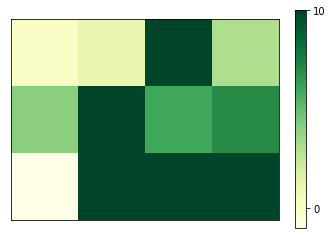

t: 0, observation: 8, reward: 0, done: False, info: {}


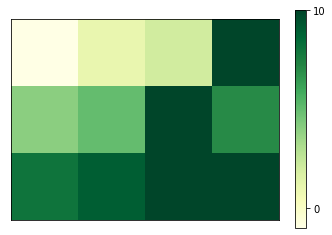

t: 1, observation: 0, reward: 0, done: False, info: {}


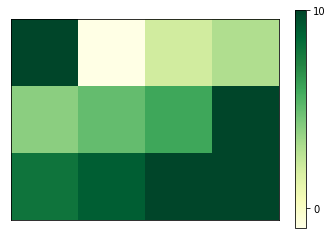

t: 2, observation: 1, reward: 0, done: False, info: {}


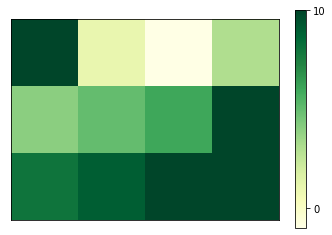

t: 3, observation: 2, reward: 0, done: False, info: {}


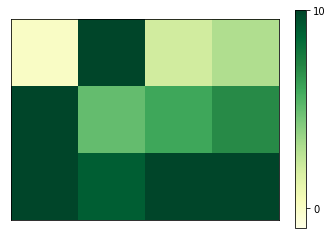

t: 4, observation: 4, reward: 1, done: False, info: {}


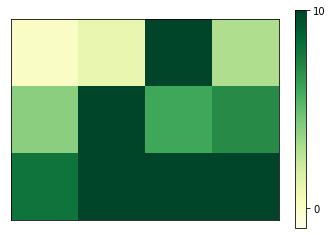

t: 5, observation: 5, reward: 0, done: False, info: {}


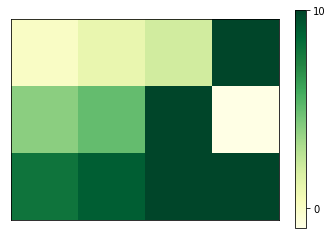

t: 6, observation: 7, reward: 0, done: False, info: {}


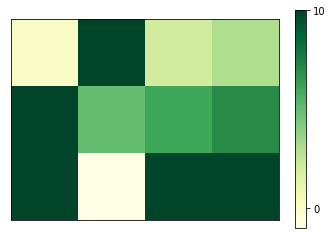

t: 7, observation: 9, reward: 0, done: False, info: {}


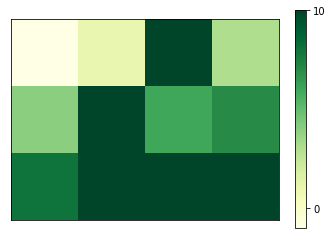

t: 8, observation: 0, reward: 0, done: False, info: {}


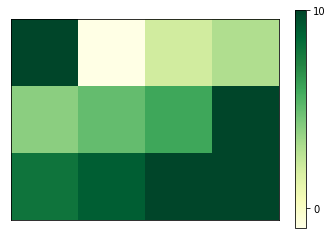

t: 9, observation: 1, reward: 0, done: True, info: {}
Episode finished after 10 timesteps


In [5]:
import gym
import numpy as np

env = StochasticEnv()
observation = env.reset()
for t in range(10):
    action = np.random.randint(0, 4)
    observation, reward, done, info = env.step(action)
    env.render()
    print(f"t: {t}, observation: {observation}, reward: {reward}, done: {done}, info: {info}")
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

#**PART 2**

#Q-Learning Deterministic Env

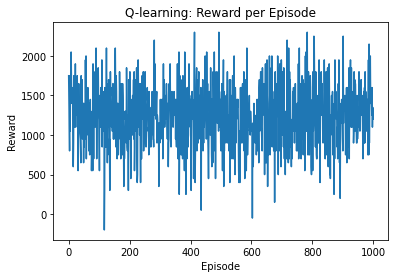

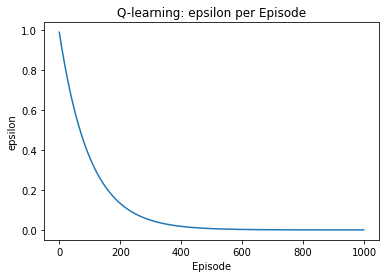

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = DeterministicEnv()


alpha = 0.1
gamma = 0.99
epsilon = 1
num_episodes = 1000


Q = np.zeros([env.observation_space.n, env.action_space.n])


rewards_per_episode = []
steps_per_episode = []


for i in range(num_episodes):
    
    state = env.reset()
    done = False
    total_reward = 0
    step = 0.99

    while not done:
        
        
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        
        next_state, reward, done, _ = env.step(action)

        
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        
        total_reward += reward
        state = next_state

  
    rewards_per_episode.append(total_reward)
    epsilon*=step
    steps_per_episode.append(epsilon)


plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning: Reward per Episode')
plt.show()


plt.plot(steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.title('Q-learning: epsilon per Episode')
plt.show()



In [7]:
import pickle


file_path = 'q_table_deterministic.pickle'

with open(file_path, 'wb') as f:
    pickle.dump(Q, f)


#Q-Learning Stochastic Env

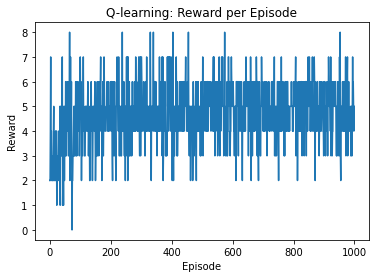

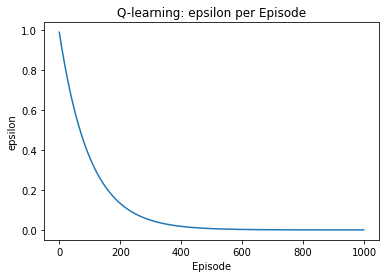

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = StochasticEnv()

alpha = 0.1
gamma = 0.99
epsilon = 1
num_episodes = 1000


Q = np.zeros([env.observation_space.n, env.action_space.n])


rewards_per_episode = []
steps_per_episode = []


for i in range(num_episodes):
    
    state = env.reset()
    done = False
    total_reward = 0
    step = 0.99

    while not done:
        

        
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        
        next_state, reward, done, _ = env.step(action)

        
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        
        total_reward += reward
        state = next_state

  
    rewards_per_episode.append(total_reward)
    epsilon*=step
    steps_per_episode.append(epsilon)


plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning: Reward per Episode')
plt.show()


plt.plot(steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.title('Q-learning: epsilon per Episode')
plt.show()


In [9]:
Q

array([[ 3.31623948, 27.72837889,  1.23117457,  2.56917287],
       [27.65698157,  4.63475751,  4.72404838,  1.24947178],
       [ 5.95948311, 28.69695695,  5.13894873,  6.48519408],
       [ 2.51152129,  1.17584551, 27.90540075,  2.91685356],
       [ 4.54088123, 28.15599452,  3.30175941,  6.63229171],
       [27.76629878,  2.20470303,  1.7474939 ,  3.32514282],
       [ 6.31821996,  4.17011784, 28.70753222,  4.65074962],
       [ 3.05815804,  2.96595242,  1.81910114, 28.79330986],
       [27.4286545 ,  2.28783655,  1.91237637,  1.07853871],
       [ 3.92654315, 28.09828996,  4.55709576,  6.51210449],
       [27.95155472,  1.1856953 ,  1.67027124,  1.33886817],
       [ 3.63821036,  3.63305431, 28.86960162,  5.23669814]])

In [10]:
import pickle


file_path = 'q_table_stochastic.pickle'


with open(file_path, 'wb') as f:
    pickle.dump(Q, f)


#SARSA

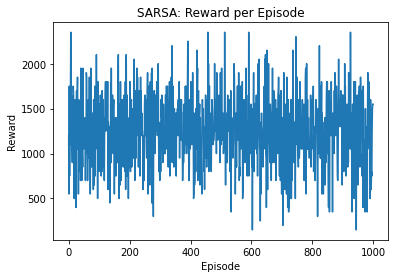

In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = DeterministicEnv()


alpha = 0.01
gamma = 0.99
epsilon = 0.1
num_episodes = 1000


Q = np.zeros([env.observation_space.n, env.action_space.n])


rewards_per_episode = []
steps_per_episode = []


for i in range(num_episodes):
 
    state = env.reset()
    done = False
    total_reward = 0
    step = 0

 
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])

    while not done:
        step += 1

        
        next_state, reward, done, _ = env.step(action)

  
        if np.random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_state, :])

     
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

    
        total_reward += reward
        state = next_state
        action = next_action

    
    rewards_per_episode.append(total_reward)
    steps_per_episode.append(step)


plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('SARSA: Reward per Episode')
plt.show()

In [12]:
import pickle


file_path = 'sarsa_table_deterministic.pickle'


with open(file_path, 'wb') as f:
    pickle.dump(Q, f)


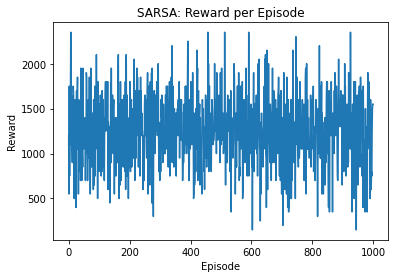

In [13]:
import gym
import numpy as np


def sarsa(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_episodes=1000):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for i_episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy(Q, state, env.action_space.n, epsilon)
        while True:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy(Q, next_state, env.action_space.n, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state = next_state
            action = next_action
            if done:
                break
    return Q


def epsilon_greedy(Q, state, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(num_actions)
    else:
        return np.argmax(Q[state, :])


env = StochasticEnv()
Q = sarsa(env)
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('SARSA: Reward per Episode')
plt.show()

In [14]:
Q

array([[2.41263405, 3.5456613 , 2.08456068, 1.7809595 ],
       [3.34044259, 1.20220946, 1.86872868, 1.21559742],
       [2.53450874, 3.33036762, 3.23577065, 4.48023382],
       [2.87243994, 1.7050403 , 1.65110932, 2.00396499],
       [3.24631596, 2.52830535, 2.24148295, 1.56864387],
       [3.59053677, 2.0943878 , 1.73834344, 1.83506302],
       [4.49600601, 2.9529091 , 3.39008676, 3.58741031],
       [2.43081433, 2.70302316, 2.19011348, 4.19807783],
       [3.06557559, 1.25008221, 1.88441172, 1.36693249],
       [2.58745746, 3.5120754 , 2.47707658, 2.41221274],
       [3.42227379, 1.01067973, 1.00128481, 1.89715175],
       [4.20949388, 3.27051748, 3.32644651, 2.67169236]])

In [15]:
import pickle


file_path = 'sarsa_table_stochastic.pickle'


with open(file_path, 'wb') as f:
    pickle.dump(Q, f)


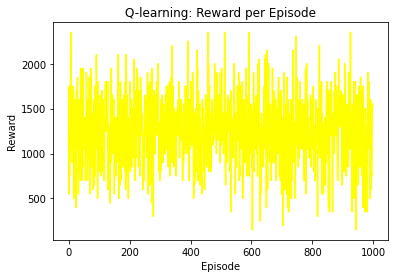

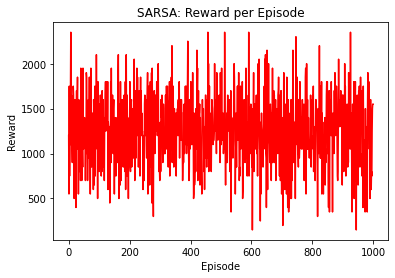

In [16]:
plt.plot(rewards_per_episode, color = "yellow")
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning: Reward per Episode')
plt.show()

plt.plot(rewards_per_episode, color = "red")
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('SARSA: Reward per Episode')
plt.show()

#Part 3

In [17]:
import gymnasium
from gymnasium import spaces
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
# Defining the Stock Trading Environment.
"""DON'T MAKE ANY CHANGES TO THE ENVIRONMENT."""


class StockTradingEnvironment(gymnasium.Env):
    """This class implements the Stock Trading environment."""

    def __init__(self, file_path, train=True, number_of_days_to_consider=10):
        """This method initializes the environment.

        :param file_path: - Path of the CSV file containing the historical stock data.
        :param train: - Boolean indicating whether the goal is to train or test the performance of the agent.
        :param number_of_days_to_consider = Integer representing the number of days the for which the agent
                considers the trend in stock price to make a decision."""

        self.file_path = file_path
        self.stock_data = pd.read_csv(self.file_path)
        self.train = train

        # Splitting the data into train and test datasets.
        self.training_stock_data = self.stock_data.iloc[:int(0.8 * len(self.stock_data))]
        self.testing_stock_data = self.stock_data.iloc[int(0.8 * len(self.stock_data)):].reset_index()

        self.observation_space = spaces.Discrete(4)
        self.action_space = spaces.Discrete(3)

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # This defines the number of days for which the agent considers the data before taking an action.
        self.number_of_days_to_consider = number_of_days_to_consider
        # The maximum timesteps the agent will take before the episode ends.
        if self.train:
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider
        else:
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider
        # Initializing the number of steps taken to 0.
        self.timestep = 0
        self.reset()

    def reset(self):
        """This method resets the environment and returns the observation.

        :returns observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.

                 info: - info: - A dictionary that can be used to provide additional implementation information."""

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # Initializing the number of steps taken to 0.
        self.timestep = 0

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector that will be passed to the agent.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector.
            observation = [price_increase, stock_held]

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        info = None

        return observation, info

    def step(self, action):
        """This method implements what happens when the agent takes the action to Buy/Sell/Hold.

        :param action: - Integer in the range 0 to 2 inclusive.

        :returns observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.
                 reward: - Integer/Float value that's used to measure the performance of the agent.
                 terminated: - Boolean describing whether the episode has terminated.
                 truncated: - Boolean describing whether a truncation condition outside the scope of the MDP is satisfied.
                 info: - A dictionary that can be used to provide additional implementation information."""

        # We give the agent a penalty for taking actions such as buying a stock when the agent doesn't have the
        # investment capital and selling a stock when the agent doesn't have any shares.
        penalty = 0

        if self.train:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.training_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value +=\
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider]\
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        else:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.testing_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = self.training_stock_data['Open'][
                                           self.timestep + self.number_of_days_to_consider] * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        # Determining if the agent currently has shares of the stock or not.
        if self.number_of_shares > 0:
            stock_held = True
        else:
            stock_held = False

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        self.timestep += 1  # Increasing the number of steps taken by the agent by 1.

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        # Computing the total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # Appending the total account value of the list to plot the graph.
        self.total_account_value_list.append(self.total_account_value)

        # The episode terminates when the maximum timesteps have been reached.
        terminated = True if (self.timestep >= self.max_timesteps) \
            else False
        truncated = False
        info = {}

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        """This method renders the agent's total account value over time.

        :param mode: 'human' renders to the current display or terminal and returns nothing."""

        plt.figure(figsize=(15, 10))
        plt.plot(self.total_account_value_list, color='lightseagreen', linewidth=7)
        plt.xlabel('Days', fontsize=32)
        plt.ylabel('Total Account Value', fontsize=32)
        plt.title('Total Account Value over Time', fontsize=38)
        plt.grid()
        plt.show()

In [19]:
# NOTE: You can adjust the parameter 'number_of_days_to_consider'
stock_trading_environment_train = StockTradingEnvironment('./NVDA.csv', train = True, number_of_days_to_consider=10)

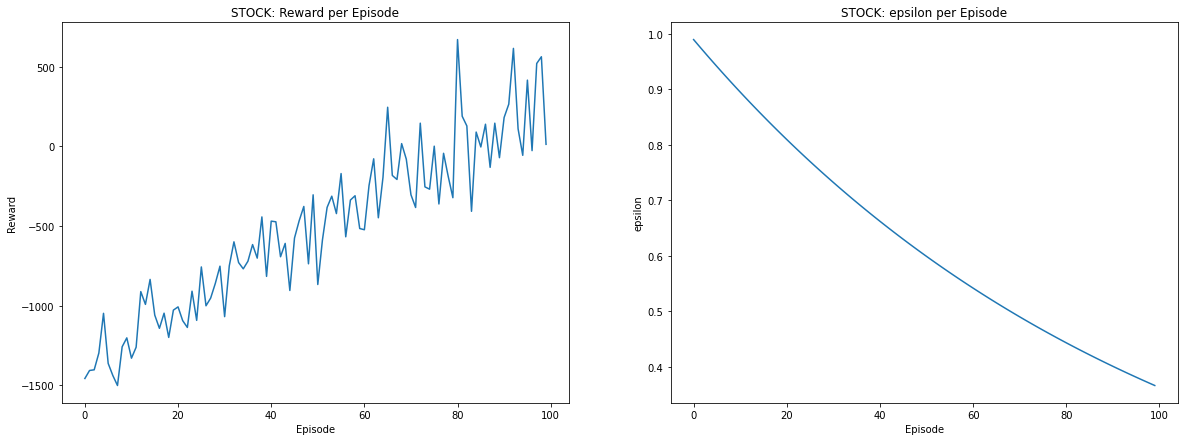

In [20]:
env = stock_trading_environment_train


alpha = 0.01
gamma = 0.9999
epsilon = 1
num_episodes = 100


Q = np.zeros([env.observation_space.n, env.action_space.n])


rewards_per_episode = []
steps_per_episode = []


for i in range(num_episodes):
    
    state = env.reset()
    new_state = state[0]
    done = False
    total_reward = 0
    step = 0.99

    while not done:
        
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[new_state, :])

        
        next_state, reward, done, _, _ = env.step(action)

        
        Q[new_state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[new_state, action])

        
        total_reward += reward
        new_state = next_state

  
    rewards_per_episode.append(total_reward)
    epsilon*=step
    steps_per_episode.append(epsilon)


plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('STOCK: Reward per Episode')

plt.subplot(1,2,2)
plt.plot(steps_per_episode)
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.title('STOCK: epsilon per Episode')
plt.show()